In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [3]:
%matplotlib inline

# Problem Set 6

### PHYS 441

***

Adam A Miller  
09 November 2022  
version 0.1

Problem sets for Phys 441 are due 1 week after they are assigned at 11:59 pm. 

Every student is responsible for submitting their own *individual* solutions. Solutions must be either an executable jupyter notebook or Adobe PDF file submitted via Canvas. You must **show all your work** (if you submit a pdf, be sure the pdf does not cut off text or lines of code). Submissions that only include answers will have points deducted.

If the problem set calls for an integral, please calculate the integral by hand (in general any problem with integrals will not require the use of mathematica or similar tools).

If you wish to "write mathematics" in a Jupyter notebook, this can be done using LaTeX formatting.

LaTeX is great at typesetting mathematics. Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed random variables with $\text{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2 < \infty$, and let

$$S_n = \frac{X_1 + X_2 + \cdots + X_n}{n}
      = \frac{1}{n}\sum_{i}^{n} X_i\$$
      
denote their mean. Then as $n$ approaches infinity, the random variables $\sqrt{n}(S_n - \mu)$ converge in distribution to a normal $\mathcal{N}(0, \sigma^2)$.

You can find a [summary of all the LaTeX math symbols](https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols) from Overleaf. 

## Problem 1)

During the winter in Evanston it snows on average once every five days. 

You have a professor that studies data science who claims to be smarter than meteorologists. The professor develops a model to predict whether or not it will snow the following day. On 75% of the days when it snows the professor had predicted snow, and on 60% of the days when it does not snow the professor predicted no snow. 

The professor has predicted that it is going to snow tomorrow, what is the probability that it will actually snow?  
How much does this probability differ from the prior?

In this case, the prior is that it snows once every five days on average, so that on any particular day (not knowing when it has last snowed), $\mu_p=0.2$.<br><br>



## Problem 2)

**Problem 2a**

You wish to estimate the parameters of a Gaussian p.d.f. You assign a prior to the model parameters of $\mu_p = 2$ and $\sigma_p = 2$ and collect samples that have sample mean $\bar{x} = 5$ and sample standard deviation $s = 6$. 

Make a plot of the posterior, the prior, and the likelihood over the range $-5 \le x \le 15$. Be sure to clearly label everything in your plot.

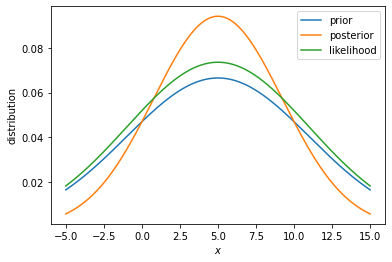

In [81]:
from scipy.stats import norm
x = np.linspace(-5, 15, num=100000)
mu_data, sig_data = 5, 6
mu_prior, sig_prior = 5, 6

mu_post, sig_post = (mu_prior*pow(sig_prior,-2)+mu_data*pow(sig_data,-2))/(pow(sig_prior,-2)+pow(sig_data,-2)), pow(pow(sig_prior,-2)+pow(sig_data,-2),-1/2)

prior = norm(loc=mu_prior, scale=sig_prior).pdf(x)
post = norm(loc=mu_post, scale=sig_post).pdf(x)

# In the probabilistic framework, likelihood=(posterior/prior)*probability of data
likelihood = np.divide(post, prior)
p_data = np.power(np.sum(likelihood*(20/100000)),-1) # Probability of data is normalizing factor
likelihood *= p_data

plt.plot(x, prior, label='prior');
plt.plot(x, post, label='posterior');
plt.plot(x, likelihood, label='likelihood');
plt.legend();
plt.xlabel(r'$x$');
plt.ylabel(r'distribution');


**Problem 2b**

Using the same prior, you collect more samples and measure $\bar{x} = 4.7$ and $s = 1.8$. Once again plot the posterior, prior, and likelihood. 

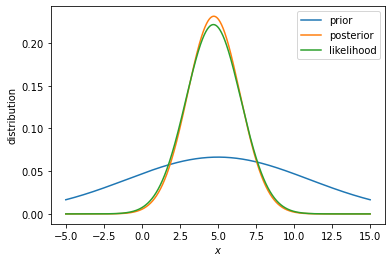

In [83]:
mu_data, sig_data = 4.7, 1.8

mu_post, sig_post = (mu_prior*pow(sig_prior,-2)+mu_data*pow(sig_data,-2))/(pow(sig_prior,-2)+pow(sig_data,-2)), pow(pow(sig_prior,-2)+pow(sig_data,-2),-1/2)

post = norm(loc=mu_post, scale=sig_post).pdf(x)

# In the probabilistic framework, likelihood=(posterior/prior)*probability of data
likelihood = np.divide(post, prior)
p_data = np.power(np.sum(likelihood*(20/100000)),-1) # Probability of data is normalizing factor
likelihood *= p_data

plt.plot(x, prior, label='prior');
plt.plot(x, post, label='posterior');
plt.plot(x, likelihood, label='likelihood');
plt.legend();
plt.xlabel(r'$x$');
plt.ylabel(r'distribution');

**Problem 2c**

Using the same prior, you collect more samples and measure $\bar{x} = 5.1$ and $s = 0.84$. Once again plot the posterior, prior, and likelihood. 

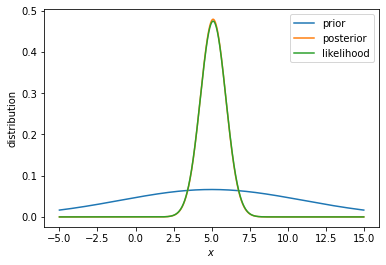

In [84]:
mu_data, sig_data = 5.1, 0.84

mu_post, sig_post = (mu_prior*pow(sig_prior,-2)+mu_data*pow(sig_data,-2))/(pow(sig_prior,-2)+pow(sig_data,-2)), pow(pow(sig_prior,-2)+pow(sig_data,-2),-1/2)

post = norm(loc=mu_post, scale=sig_post).pdf(x)

# In the probabilistic framework, likelihood=(posterior/prior)*probability of data
likelihood = np.divide(post, prior)
p_data = np.power(np.sum(likelihood*(20/100000)),-1) # Probability of data is normalizing factor
likelihood *= p_data

plt.plot(x, prior, label='prior');
plt.plot(x, post, label='posterior');
plt.plot(x, likelihood, label='likelihood');
plt.legend();
plt.xlabel(r'$x$');
plt.ylabel(r'distribution');


**Problem 2d**

Can you make any general conclusions about the posterior based on the plots above?

*write your answer here*



## Problem 3)

**Problem 3a**

Research on a new drug, that has conveniently been named zipvicor, has shown that it can dramatically reduce the chances that a person suffers from a stroke. An observed side effect from the drug is that it causes excessively dry skin. 

In a study of 75 patients, researchers have found that 14 of them experienced the dry skin condition. The researchers want to know what is the probability of experiencing dry skin due to the drug, and everyone agrees that the binomial distribution is the correct form of the p.d.f. in this case:

$$P(r; n, p) = \frac{n!}{r!(n-r)!}p^r(1-p)^{n-r}$$

For the trial, $n = 75$ and $r = 14$. There are both frequentists and Bayesians attempting to analyze the trial data.

**Problem 3a**

The Frequentists naturally propose the Maximum Likelihood method. Show, through explicit calculation, that the ML estimator and its variance are:
$$
 \hat{p}_\mathrm{ML} = \frac{r}{n}  \qquad {\mathrm{and}} \qquad
 \hat{\sigma^2}_\mathrm{ML} = \frac{r (n-r)}{n^3} = \frac{\hat{p}_\mathrm{ML} (1-\hat{p}_\mathrm{ML})}{n} .
$$ 

The log of the likelihood is<br>
$\log{L(n,p)}=\sum_{i=1}^N \log{P(r_i;n,p)}=\sum_{i=1}^N \log\left(\frac{n!}{r_i!(n-r_i)!}p^{r_i}(1-p)^{n-r_i}\right)$<br><br>
To maximize the likelihood, we take $\frac{\partial L}{\partial p}=0$<br><br>
Taking a derivative over $p$ on both sides of the expression for $\log{L}$,<br>
$\frac{\partial}{\partial p}\left[\log{L(n,p)}\right]=\frac{\partial}{\partial p}\left[\sum_{i=1}^N \log\left(\frac{n!}{r_i!(n-r_i)!}p^{r_i}(1-p)^{n-r_i}\right)\right]$<br>
$\implies \frac{1}{L}\frac{\partial L}{\partial p}=\sum_{i=1}^N \frac{\partial}{\partial p}\left[\log\left(\frac{n!}{r_i!(n-r_i)!}p^{r_i}(1-p)^{n-r_i}\right)\right]=0$<br><br>
Note that<br>
$\frac{\partial}{\partial p}\left[\log\left(f(p)\right)\right]=\frac{1}{f(p)}\frac{\partial}{\partial p}\left[f(p)\right]$
<br><br>
After simplifying,<br>
$\frac{\partial}{\partial p}\left[\log\left(\frac{n!}{r_i!(n-r_i)!}p^{r_i}(1-p)^{n-r_i}\right)\right]=\frac{np-r_i}{p(p-1)}$<br><br>
One can also check this in Mathematica: "FullSimplify[D[Log[(n!/(r!(n-r!)))p^r(1-p)^(n-r)],p]]"<br><br>
Therefore,<br>
$\sum_{i=1}^N\frac{np-r_i}{p(p-1)}=0$<br><br>                                                                                 
For our single trial, where $r_i=r=14$, we then have<br>
$\frac{np-r}{p(p-1)}=0$<br><br>
For $p\ne0,1$, the denominator will always be nonzero, so the maximum likelihood probability will be when the numerator vanishes.<br>
$\implies n\hat{p}_\mathrm{ML}-r=0\implies \hat{p}_\mathrm{ML}=\frac{r}{n}$<br><br> 
For the variance of the estimator, note that<br>
$V[\hat{p}_\mathrm{ML}]=V[\frac{r}{n}]=\frac{1}{n^2}V[r]$<br><br>
Now, since $r$ (the number of successes) is distributed binomially, it has the usual binomial variance $V[r]=np(1-p)$.<br>
$\implies V[\hat{p}_\mathrm{ML}]=\hat{\sigma^2}_\mathrm{ML}=\frac{1}{n^2}\times n\hat{p}_\mathrm{ML}(1-\hat{p}_\mathrm{ML})= \frac{\hat{p}_\mathrm{ML} (1-\hat{p}_\mathrm{ML})}{n}$

**Problem 3b**

What is the value for $\hat{p}_\mathrm{ML}$ and what is the 68\% CL confidence interval?
(In this case you can assume that the pdf for $\hat{p}_\mathrm{ML}$ is nearly normal.)

$\hat{p}_\mathrm{ML}=\frac{r}{n}=\frac{14}{75}=0.18\overline{6}$<br>
$V[\hat{p}_\mathrm{ML}]=\frac{\hat{p}_\mathrm{ML} (1-\hat{p}_\mathrm{ML})}{n}=\frac{(14/75)(1-(14/75))}{75}=\frac{854}{421875}=2.024\overline{296}\times10^{-3}$
<br><br>
Taking the pdf for $\hat{p}_\mathrm{ML}$ to be normal with mean $\mu_\hat{p}=0.18\overline{6}$ and variance $\sigma^2_\hat{p}=2.024\overline{296}\times10^{-3}$, the 68% CL confidence interval spans approximately $(0.1419,0.2314)$ (see code below).

In [39]:
mu = 14/75
sigma = np.sqrt(854/421875)
dist = norm(loc=mu , scale=sigma)
print("68% confidence interval is ({0:.4f},{1:.4f})".format(dist.ppf(0.16), dist.ppf(0.84)))

68% confidence interval is (0.1419,0.2314)


**Problem 3c**

The Food and Drug Administration (FDA) will prohibit zipvicor if the fraction
of people taking the drug suffering dry skin is 25% or greater.
They ask the researchers: is $p < 0.25$ at 90% CL?
What is the answer?

Taking the pdf for $\hat{p}_\mathrm{ML}$ to be normal as in part b, the 90% CL confidence interval is about $(0.1127,0.2607)$ (see code below).<br><br>
For this confidence interval, we see it extends past $p=0.25$ at the upper end, so the FDA will make the decision to prohibit zipvicor, as there is a possibility -- at 90% confidence -- of more than 25% of people suffering dry skin.

In [40]:
from scipy.stats import norm
mu = 14/75
sigma = np.sqrt(854/421875)
dist = norm(loc=mu , scale=sigma)
print("90% confidence interval is ({0:.4f},{1:.4f})".format(dist.ppf(0.05), dist.ppf(0.95)))

90% confidence interval is (0.1127,0.2607)


**Problem 3d**

The Bayesians analyzing the data are not happy with these conclusions. They want a pdf for $p$.
Evoking Bayes' Rule, they write
$$
 g(p) = \frac{ P(D|p) \, \pi(p)}{P(D)}
$$
where $g(p)$ is the desired posterior pdf for $p$ and $\pi(p)$ is the prior.
For the present problem, this means
$$
 g(p) = K \, p^r\,(1-p)^{n-r} \, \pi(p)
$$
where $K$ is a normalization constant that could be calculated from the beta function integral
but which also is determined by the normalization condition for $g(p)$.

The Bayesian propose a uniform distribution as the prior, $\pi(p)$.

What is the expression for $g(p)$ in this case, and what is its mode, $p_{\mathrm{mode}}$?

Since $p$ is defined between 0 and 1,<br>
$\pi(p)=\begin{cases}
1,\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}\implies g(p)=\begin{cases}
Kp^r(1-p)^{n-r},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$
<br><br>
For $n=75$ and $r=14$, we have
$g(p)=\begin{cases}
Kp^{14}(1-p)^{61},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$
<br><br>
Then, we find $K$ by normalizing the pdf:<br>
$1=\int_0^1 g(p)dp=K\int_0^1 p^{14}(1-p)^{61}dp\approx 2.3469\times10^{-17}K\implies K\approx 4.2610\times10^{16}$<br><br>
Thus,<br>
$g(p)=\begin{cases}
4.2610\times10^{16}p^{14}(1-p)^{61},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$<br><br>
The mode $p_{mode}$ is the value of $p$ at which $g(p)$ is maximized. The binomial pdf will have 1 defined maxima in this case, which we can find by differentiating $g(p)$ over $p$ and setting to 0:<br>
$\frac{\partial g(p)}{\partial p}=4.2610\times10^{16}\frac{\partial}{\partial p}p^{14}(1-p)^{61}=4.2610\times10^{16}p^{13}(1-p)^{60}(14-75p)=0\implies p=\{0\;\text{mult 13},1\;\text{mult 60},\frac{14}{75}\}$<br><br>
The sensible result for the mode is therefore<br>
$p_{mode}=\frac{14}{75}=0.18\overline{6}$

**Problem 3e**

Given $g(p)$ from part (d), what is the expectation value for $p$, $\mu_p = E[p]$?
What is the 68\% credible interval, taking it to be centered on $\mu_p$? 
(It is probably best to answer this question by writing a program to do the
numerical calculations.)

In [32]:
# Expectation value calculation
p = np.linspace(0,1,num=100000)
integral = 0
for i in range(100000):
    integral += np.power(p[i],15)*np.power(1-p[i],61)*0.00001
mu = 4.261e16*integral
print("E[p]~{:.4f}".format(mu))

# Credible interval
alpha = 0.32 # probability for p in desired region is 1-0.32=0.68

f_p = 4.261e16*np.power(p,14)*np.power(np.full(len(p),1)-p,61)
reverse_f_p = f_p[::-1]

integral_a, integral_b = 0, 0
ind_a, ind_b = 0, 0
for i in range(100000):
    if integral_a < alpha/2:
        integral_a += f_p[i]*0.00001
        ind_a = i
    if integral_b < alpha/2:
        integral_b += reverse_f_p[i]*0.00001
        ind_b = i

print("68% credible interval is ({0:.4f} <= p <= {1:.4f})".format(p[ind_a], p[ind_b]))

E[p]~0.1948
68% credible interval is (0.1502 <= p <= 0.7605)


$E[p]=\int_0^1 pg(p)dp=K\int_0^1 p^{r+1}(1-p)^{n-r}dp=4.2610\times10^{16}\int_0^1 p^{15}(1-p)^{61}dp\approx 0.1948$<br>
One can confirm this both with the code above, or with the Mathematica code: "N[(4.26100731615792*10^16) Integrate[x^(15)(1-x)^(61),{x,0,1}]]"<br><br>
Also, as found with my code,the 68% credible region for $p$ is about $0.1502\le p\le0.7605$.

**Problem 3f**

What is the probability that $p > 0.25$?   What is the conclusion of the FDA
in this case, if you interpret "90% CL" to mean $P(p > 0.25) < 0.1$?

$P(p>0.25)=\int_{0.25}^{1}g(p)dp=4.2610\times10^{16}\int_{0.25}^{1}p^{14}(1-p)^{61}dp\approx0.1144$<br>
See the Mathematica code: "N[(4.26100731615792*10^16) Integrate[x^(14)(1-x)^(61),{x,0.25,1}]]"<br><br>
Our calculated probability $P(p>0.25)$ is $>0.1$, so it is outside
the FDA's 90% CL, meaning that they will prohibit zipvicor in this case.

**Problem 3g**

One of the Bayesian statisticians argues that a uniform prior $\pi(p)$ is nonsense
and makes the case that $\pi(p) = 1/p$.  A few people tut-tut about improper priors,
but she forges ahead, arguing that $g(p)$ is still integrable, and that's what counts.

Using this new prior, what are $p_{\mathrm{mode}}$, $\mu_p$, and the probability
that $p > 0.25$?

$\pi(p)=\frac{1}{p}\implies g(p)=
Kp^{r-1}(1-p)^{n-r}=
Kp^{13}(1-p)^{61}$
<br><br>
We need to again find $K$ by normalizing the pdf:<br>
$1=\int_0^1 g(p)dp=K\int_0^1 p^{13}(1-p)^{61}dp\approx 1.2740\times10^{-16}K\implies K\approx 7.8492\times10^{15}$<br><br>
Thus,<br>
$g(p)=
7.8492\times10^{15}p^{13}(1-p)^{61}$<br><br>
Finding $p_{mode}$:<br>
$\frac{\partial g(p)}{\partial p}=7.8492\times10^{15}\frac{\partial}{\partial p}p^{13}(1-p)^{61}=7.8492\times10^{15}p^{12}(1-p)^{60}(13-74p)=0\implies p=\{0\;\text{mult 12},1\;\text{mult 60},\frac{13}{74}\}$<br><br>
The sensible result for the mode is therefore<br>
$p_{mode}=\frac{13}{74}=0.1\overline{756}$<br><br>
$\mu_p=E[p]=\int_0^1 pg(p)dp=K\int_0^1 p^{r}(1-p)^{n-r}dp=7.8492\times10^{15}\int_0^1 p^{14}(1-p)^{61}dp\approx 0.1842$<br><br>
$P(p>0.25)=\int_{0.25}^{1}g(p)dp=7.8492\times10^{15}\int_{0.25}^1 p^{13}(1-p)^{61}dp \approx0.0769$

**Problem 3h**

The FDA is unhappy that the results of the trial seem to be strongly dependent on the method of analysis. They order additional trials of zipvicor, and request that a flat prior be used. In the new trial, $n' = 110$ subjects are tested, and $r' = 24$ have dry skin.

First, is this result consistent with the first?  Use a Frequentist approach
and the test on the difference in means:
$$
   z_D = \frac{ \hat{p}_\mathrm{ML} - \hat{p}'_\mathrm{ML} }{\sqrt{ \hat{\sigma^2}_\mathrm{ML} + \hat{\sigma^2}'_\mathrm{ML}}}
$$
What is the value for $z_D$ and what is the (two-sided) probability to observe
a value for $|z_D|$ as large as this or larger?  Are the two values compatible?
Explain why or why not.

Recall from part a that <br>
$\hat{p}_\mathrm{ML}=\frac{r}{n}$,$\;\;\;V[\hat{p}_\mathrm{ML}]=\frac{\hat{p}_\mathrm{ML} (1-\hat{p}_\mathrm{ML})}{n}$<br><br>
For the original trial, we have<br>
$\hat{p}_\mathrm{ML}=\frac{14}{75}=0.18\overline{6}$<br>
$V[\hat{p}_\mathrm{ML}]=\frac{854}{421875}=2.024\overline{296}\times10^{-3}$<br><br>
For the new trial, we have<br>
$\hat{p}'_\mathrm{ML}=\frac{24}{110}=\frac{12}{55}=0.2\overline{18}$<br>
$V[\hat{p}'_\mathrm{ML}]=\frac{(24/110)(1-(24/110))}{110}=\frac{258}{166375}\approx 1.5507\times10^{-3}$<br><br>
$\implies z_D=\frac{ (0.18\overline{6}) - (0.2\overline{18}) }{\sqrt{ (2.024\overline{296}\times10^{-3}) + (1.5507\times10^{-3})}}\approx-0.5271$<br><br>
For this $z_D$ value, the two-sided probability of a $|z_D|$ as extreme or more extreme than the one measured (p-value) is ~0.5981 (see code below). This is well above the usual 0.05 threshold -- suggesting that we cannot reject the idea of the two values of $\hat{p}_\mathrm{ML}$ being compatible. For a two-sample z test like this, a low p-value would be a sign of incompatibility between the two sample values, but that's not what we see here.

In [42]:
zD = -0.5271
pval = 2*(norm.sf(abs(zD)))
print("(Two-sided) probability for as extreme or more extreme |z_D| is {:.4f}".format(pval))

(Two-sided) probability for as extreme or more extreme |z_D| is 0.5981


**Problem 3i**

For the pooled sample, and using the flat prior as in **3d**, calculate $p_{\mathrm{mode}}$,
$\mu_p$, and $P(p > 0.25)$.  Will the FDA official grant permission to use zipvicor?

For the pooled/combined sample, we have a total $n=110+75=185$ samples and $r=14+24=38$ successes.<br><br>
$\pi(p)=\begin{cases}
1,\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}\implies g(p)=\begin{cases}
Kp^r(1-p)^{n-r},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$
<br><br>
For $n=185$ and $r=38$, we have
$g(p)=\begin{cases}
Kp^{38}(1-p)^{185},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$
<br><br>
Then, we find $K$ by normalizing the pdf:<br>
$1=\int_0^1 g(p)dp=K\int_0^1 p^{38}(1-p)^{185}dp\approx 3.8523\times10^{-46}K\implies K\approx 2.5959\times10^{45}$<br><br>
Thus,<br>
$g(p)=\begin{cases}
2.5959\times10^{45}p^{38}(1-p)^{185},\;0\le p\le1\\
0,\;\text{otherwise}\\
\end{cases}$<br><br>
To find $p_{mode}$:<br>
$\frac{\partial g(p)}{\partial p}=2.5959\times10^{45}\frac{\partial}{\partial p}p^{38}(1-p)^{185}=2.5959\times10^{45}p^{37}(1-p)^{184}(38-223p)=0\implies p=\{0\;\text{mult 37},1\;\text{mult 184},\frac{38}{223}\}$<br><br>
The sensible result for the mode is therefore<br>
$p_{mode}=\frac{38}{223}\approx 0.1704$<br><br>
$\mu_p=E[p]=\int_0^1 pg(p)dp=K\int_0^1 p^{r+1}(1-p)^{n-r}dp=2.5959\times10^{45}\int_0^1 p^{39}(1-p)^{185}dp=0.17\overline{3}$<br><br>
$P(p>0.25)=\int_{0.25}^{1}g(p)dp=2.5959\times10^{45}\int_{0.25}^1 p^{38}(1-p)^{185}dp \approx0.00257$<br><br>
For the pooled sample, the FDA would grant permission to use zipvicor. If we use the condition of part 3f, that a 90% confidence interval entails $P(p>0.25)<0.1$, then the pooled sample gives a result well within their confidence interval, and would therefore be approved FDA permission.

**Problem 3j**

Notice that $\mu_p$ increased but $P(p > 0.25)$ decreased.  
Also $p_{\mathrm{mode}}$ and $\mu_p$ are now closer together
in value.

Explain each of these two conclusions.

*write your answer here*

**Problem 3k**

Provide a single plot with three curves showing $g(p)$ for 
parts **3e**, **3g**, and **3i**. Label the curves clearly.

The curves for (e) and (g) are different, but not very different.  What does this
same about the relative importance of the prior and the data, for this problem?

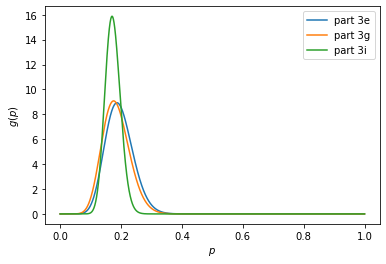

In [46]:
p = np.linspace(0,1,num=100000)

g_3e = 4.261e16*np.power(p,14)*np.power(np.full(len(p),1)-p,61)
g_3g = 7.8492e15*np.power(p,13)*np.power(np.full(len(p),1)-p,61)
g_3i = 2.5959e45*np.power(p,38)*np.power(np.full(len(p),1)-p,185)

plt.plot(p, g_3e, label='part 3e');
plt.plot(p, g_3g, label='part 3g');
plt.plot(p, g_3i, label='part 3i');
plt.legend();
plt.xlabel(r'$p$');
plt.ylabel(r'$g(p)$');

The pdfs in parts 3e and 3g only differed by the prior - a uniform prior vs a $1/p$ prior. The resulting pdfs $g(p)$ do not differ by much, as we see upon plotting them.<br><br>
But between parts 3e and 3i, we had the same uniform prior but different data. This made the posterior much sharper - reaching a higher value of the pdf at $p_{mode}$ (nearly double that in 3e) and having a smaller width to the distribution. The shape of the pdf was greatly affected.
<br><br>
Therefore, the prior does affect the posterior pdf, but the choice of data has a much more significant effect. Relatively, the data is much more important than the prior.